In [130]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import folium.plugins
import plotly
import ipywidgets as widgets
from IPython.display import display
#import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
stations = pd.read_csv('Sheriff_and_Police_Stations.csv')

In [3]:
stations_filtered = stations[['X', 'Y', 'cat2', 'city']]#, 'zip', 'POINT_X', 'POINT_Y']]

In [4]:
stations_filtered = stations_filtered[stations_filtered['cat2'] == 'Sheriff and Police Stations']

In [5]:
stations_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 116
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       105 non-null    float64
 1   Y       105 non-null    float64
 2   cat2    105 non-null    object 
 3   city    105 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.1+ KB


## Estaciones Policiales

In [6]:
m = folium.Map(location=[stations_filtered['Y'].mean(), stations_filtered['X'].mean()], zoom_start=12)

In [7]:
for idx, row in stations_filtered.iterrows():
    folium.Marker([row['Y'], row['X']]).add_to(m)

In [8]:
m

## Crímenes

In [9]:
crime_df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [10]:
#convert crime_df['DATE OCC'] to datetime
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])
crime_df['DATE OCC']

C:\Users\hp\AppData\Local\Temp\ipykernel_11872\2798668889.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])


0        2020-03-01
1        2020-02-08
2        2020-11-04
3        2020-03-10
4        2020-08-17
            ...    
951603   2024-01-13
951604   2024-02-17
951605   2024-01-16
951606   2024-01-15
951607   2024-04-24
Name: DATE OCC, Length: 951608, dtype: datetime64[ns]

In [11]:
#crime_df_2020 = crime_df[crime_df['DATE OCC'].dt.year == 2020]
crime_df_2020 = crime_df[crime_df['Crm Cd Desc'] == 'ROBBERY']
#crime_df_2020 = crime_df_2020[crime_df_2020['Premis Desc'] == 'ALLEY']

In [12]:
m2 = folium.Map(location=[crime_df_2020['LAT'].mean(), crime_df_2020['LON'].mean()], zoom_start=12)

In [13]:
'''for idx, row in crime_df.iterrows():
    folium.Marker([row['LAT'], row['LON']]).add_to(m2)'''
# Prepare the data for the heatmap
heat_data = crime_df_2020[['LAT', 'LON']].values.tolist()

# Add the heatmap layer
folium.plugins.HeatMap(heat_data).add_to(m2)

In [14]:
m2

In [15]:
stations_filtered.head(20)

,X,Y,cat2,city
0,-118.185705,33.844639,Sheriff and Police Stations,Long Beach
1,-118.126663,33.941363,Sheriff and Police Stations,Downey
2,-118.307637,33.883727,Sheriff and Police Stations,Gardena
3,-118.091208,33.946408,Sheriff and Police Stations,Santa Fe Springs
4,-117.969381,34.065952,Sheriff and Police Stations,Baldwin Park
5,-118.387567,33.838363,Sheriff and Police Stations,Redondo Beach
6,-118.354325,33.961476,Sheriff and Police Stations,Inglewood
7,-118.167967,34.044750,Sheriff and Police Stations,Monterey Park
8,-117.865451,34.135058,Sheriff and Police Stations,Glendora
9,-118.168644,34.182016,Sheriff and Police Stations,Altadena


In [16]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           951608 non-null  int64         
 1   Date Rptd       951608 non-null  object        
 2   DATE OCC        951608 non-null  datetime64[ns]
 3   TIME OCC        951608 non-null  int64         
 4   AREA            951608 non-null  int64         
 5   AREA NAME       951608 non-null  object        
 6   Rpt Dist No     951608 non-null  int64         
 7   Part 1-2        951608 non-null  int64         
 8   Crm Cd          951608 non-null  int64         
 9   Crm Cd Desc     951608 non-null  object        
 10  Mocodes         816159 non-null  object        
 11  Vict Age        951608 non-null  int64         
 12  Vict Sex        822716 non-null  object        
 13  Vict Descent    822706 non-null  object        
 14  Premis Cd       951597 non-null  flo

In [17]:
crime_df['Crm Cd Desc'].value_counts()

Crm Cd Desc
VEHICLE - STOLEN                                           103745
BATTERY - SIMPLE ASSAULT                                    74570
BURGLARY FROM VEHICLE                                       58877
THEFT OF IDENTITY                                           58800
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     57671
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
TRAIN WRECKING                                                  1
Name: count, Length: 139, dtype: int64

In [18]:
crime_df['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174018
UNKNOWN WEAPON/OTHER WEAPON                        35419
VERBAL THREAT                                      23751
HAND GUN                                           19995
SEMI-AUTOMATIC PISTOL                               7218
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [19]:
crime_df['Premis Desc'].value_counts()

Premis Desc
STREET                                          242966
SINGLE FAMILY DWELLING                          159521
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    115275
PARKING LOT                                      65603
OTHER BUSINESS                                   45306
                                                 ...  
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
HORSE RACING/SANTA ANITA PARK*                       2
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
DEPT OF DEFENSE FACILITY                             2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
Name: count, Length: 306, dtype: int64

In [20]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           951608 non-null  int64         
 1   Date Rptd       951608 non-null  object        
 2   DATE OCC        951608 non-null  datetime64[ns]
 3   TIME OCC        951608 non-null  int64         
 4   AREA            951608 non-null  int64         
 5   AREA NAME       951608 non-null  object        
 6   Rpt Dist No     951608 non-null  int64         
 7   Part 1-2        951608 non-null  int64         
 8   Crm Cd          951608 non-null  int64         
 9   Crm Cd Desc     951608 non-null  object        
 10  Mocodes         816159 non-null  object        
 11  Vict Age        951608 non-null  int64         
 12  Vict Sex        822716 non-null  object        
 13  Vict Descent    822706 non-null  object        
 14  Premis Cd       951597 non-null  flo

In [21]:
#DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LAT,LON

In [22]:

#get rid of 2024 data
crime_df = crime_df[crime_df['DATE OCC'].dt.year < 2024]

In [23]:
#time series
crime_df_date = crime_df.groupby(['DATE OCC', 'Crm Cd Desc']).size()


In [24]:
crime_df_date.columns = ['DATE OCC','CRIME DESC', 'CRIMES PER DAY']

In [25]:
crime_df_date

DATE OCC    Crm Cd Desc                                             
2020-01-01  ARSON                                                        4
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47
            ATTEMPTED ROBBERY                                            5
            BATTERY - SIMPLE ASSAULT                                    74
            BATTERY ON A FIREFIGHTER                                     1
                                                                        ..
2023-12-31  VEHICLE - ATTEMPT STOLEN                                     2
            VEHICLE - STOLEN                                            54
            VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     3
            VIOLATION OF COURT ORDER                                     7
            VIOLATION OF RESTRAINING ORDER                              10
Length: 80316, dtype: int64

In [124]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Convertir una serie de tiempo en un problema de aprendizaje supervisado.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 #if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Aplicar la función a la serie de pasajeros
'''supervised = series_to_supervised(series.values, n_in=3)
print(supervised.head())'''


'supervised = series_to_supervised(series.values, n_in=3)\nprint(supervised.head())'

In [79]:
# Create a dropdown widget
temp = crime_df['Crm Cd Desc'].value_counts()
top_10_crime_desc = crime_df['Crm Cd Desc'].value_counts().head(10).index.tolist()

dropdown = widgets.Dropdown(
    options=top_10_crime_desc,
    value=top_10_crime_desc[0],
    description='Choose:',
)

# Display the dropdown widget
display(dropdown)

# Function to handle dropdown value change
def on_value_change(change):
    print(f'Selected option: {change["new"]}')
    #plot time series
    #plot size
    crime_df_date = crime_df[crime_df['Crm Cd Desc'] == change['new']].groupby(['DATE OCC']).size()
    #get only 2023 data
    crime_df_date = crime_df_date[crime_df_date.index.year == 2023]
    #crime_df_date.plot()

    #plot decomposition of time series
    decomposition = seasonal_decompose(crime_df_date, model='multiplicative', period=7)
    fig = decomposition.plot()
    #fig size
    fig.set_size_inches(20, 15)
    plt.show()
    #plot acf
    plot_acf(crime_df_date)

    '''#check if time series is stationary
    result = adfuller(crime_df_date)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    # Interpretación de los resultados
    if result[1] < 0.05:
        print("La serie es estacionaria (rechazamos la hipótesis nula).")
    else:
        print("La serie no es estacionaria (no rechazamos la hipótesis nula).")

    

    #train test split, january to november, december for test
    crime_df_date_train = crime_df_date[crime_df_date.index.month < 12] 
    crime_df_date_test = crime_df_date[crime_df_date.index.month == 12]

    #forecasting
    #ARIMA
    model = ARIMA(crime_df_date_train, order=(7,1,0)) #order means p,d,q, p is the number of lag observations included in the model, d is the number of times that the raw observations are differenced, and q is the size of the moving average window
    model_fit = model.fit()
    print(model_fit.summary())
    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())

    #forecast
    forecast = model_fit.forecast(steps=31)
    print(forecast)
    #plot forecast
    plt.plot(crime_df_date)
    plt.plot(forecast)
    plt.show()

    #plot forecast
    plt.plot(crime_df_date_test)
    plt.plot(forecast)
    plt.show()'''




# Attach the function to the dropdown widget
dropdown.observe(on_value_change, names='value')


Dropdown(description='Choose:', options=('VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', …

Checkear Estacionariedad

In [132]:
crime_df_all = crime_df.groupby(['DATE OCC']).size()#.reset_index(name='CRIMES PER DAY')
crime_df_all.columns = ['DATE OCC', 'CRIMES PER DAY']

In [133]:
crime_df_all.values


array([1144,  527,  595, ...,  614,  588,  540], dtype=int64)

In [134]:
supervised = series_to_supervised(crime_df_all.values, n_in=15, n_out=7)
supervised.head()

,var1(t-15),var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),...,var1(t-3),var1(t-2),var1(t-1),var1(t),var1(t+1),var1(t+2),var1(t+3),var1(t+4),var1(t+5),var1(t+6)
15,1144.0,527.0,595.0,541.0,505.0,593.0,538.0,538.0,576.0,625.0,...,560.0,553.0,621.0,591,643.0,565.0,575.0,589.0,593.0,567.0
16,527.0,595.0,541.0,505.0,593.0,538.0,538.0,576.0,625.0,547.0,...,553.0,621.0,591.0,643,565.0,575.0,589.0,593.0,567.0,588.0
17,595.0,541.0,505.0,593.0,538.0,538.0,576.0,625.0,547.0,518.0,...,621.0,591.0,643.0,565,575.0,589.0,593.0,567.0,588.0,619.0
18,541.0,505.0,593.0,538.0,538.0,576.0,625.0,547.0,518.0,560.0,...,591.0,643.0,565.0,575,589.0,593.0,567.0,588.0,619.0,596.0
19,505.0,593.0,538.0,538.0,576.0,625.0,547.0,518.0,560.0,553.0,...,643.0,565.0,575.0,589,593.0,567.0,588.0,619.0,596.0,599.0


In [140]:
# Dividir los datos en entrenamiento y prueba (80% - 20%)
train_size = int(len(supervised) * 0.9)
train, test = supervised.values[:train_size], supervised.values[train_size:]

# Separar las entradas (X) y las salidas (y)
train_X, train_y = train[:, :-7], train[:, -7:]
test_X, test_y = test[:, :-7], test[:, -7:]

print("Entrenamiento X shape:", train_X.shape)
print("Entrenamiento y shape:", train_y.shape)
print("Prueba X shape:", test_X.shape)
print("Prueba y shape:", test_y.shape)

Entrenamiento X shape: (1296, 15)
Entrenamiento y shape: (1296, 7)
Prueba X shape: (144, 15)
Prueba y shape: (144, 7)


In [141]:
train_y

array([[591., 643., 565., ..., 589., 593., 567.],
       [643., 565., 575., ..., 593., 567., 588.],
       [565., 575., 589., ..., 567., 588., 619.],
       ...,
       [783., 617., 617., ..., 743., 671., 636.],
       [617., 617., 677., ..., 671., 636., 645.],
       [617., 677., 743., ..., 636., 645., 619.]])

In [144]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(train_X, train_y)

# Hacer predicciones
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

# Evaluar el modelo
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

'''print("RMSE en conjunto de entrenamiento:", train_rmse)
print("RMSE en conjunto de prueba:", test_rmse)'''

'''# Plot de las predicciones
plt.figure(figsize=(12, 6))
plt.plot(crime_df_all.index[-len(test):], test_y, label='Observado')
plt.plot(crime_df_all.index[-len(test):], test_pred, label='Predicho', color='orange')
plt.title('Predicción vs Observado en Conjunto de Prueba')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid(True)
plt.show()'''
#mean absolute percentage error
mape = mean_absolute_percentage_error(test_y, test_pred)
print("MAPE:", mape)


MAPE: 0.05694132177112956


In [146]:
for i in range(7):
    train_mape = mean_absolute_percentage_error(train_y[:, i], train_pred[:, i])
    test_mape = mean_absolute_percentage_error(test_y[:, i], test_pred[:, i])

    print(f'train_mape_{i+1}: {train_mape}')
    print(f'test_mape_{i+1}: {test_mape}\n')

train_mape_1: 0.06939526345138308
test_mape_1: 0.05647613801571327

train_mape_2: 0.07507134623175661
test_mape_2: 0.05713178924318047

train_mape_3: 0.07745020691514987
test_mape_3: 0.056377772445837096

train_mape_4: 0.07832302460932587
test_mape_4: 0.05726120909799795

train_mape_5: 0.07901568749410483
test_mape_5: 0.0574626887083335

train_mape_6: 0.07895000588129761
test_mape_6: 0.05686154579556943

train_mape_7: 0.07856291098853373
test_mape_7: 0.05701810909127522



In [153]:
test_pred

array([[615.59337494, 617.08926683, 636.1130692 , ..., 625.50274381,
        625.42716845, 634.20055962],
       [645.44241893, 653.31040245, 628.71612726, ..., 626.40527925,
        635.59181969, 629.41184618],
       [697.99725175, 655.88432513, 639.85990638, ..., 637.75663503,
        631.87631633, 633.5218285 ],
       ...,
       [641.07031438, 633.67125016, 612.56476015, ..., 611.30125919,
        621.10847727, 633.04919509],
       [638.87477398, 619.03555732, 627.97659387, ..., 623.30586894,
        636.49825586, 620.99879168],
       [580.62446826, 598.34244063, 607.34310684, ..., 630.56541482,
        612.65574352, 609.87397306]])

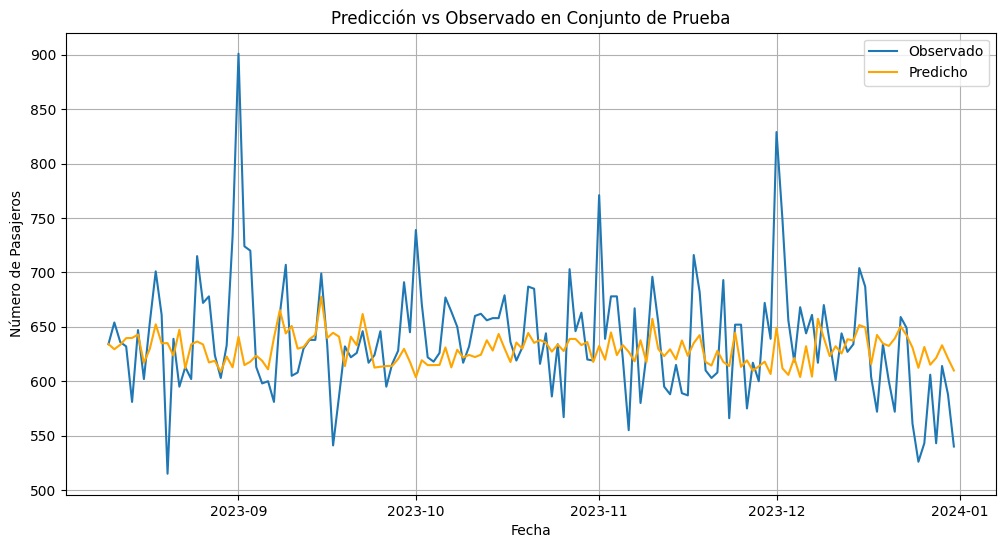

In [159]:
#plot forecast, true vs predicted
plt.figure(figsize=(12, 6))
plt.plot(crime_df_all.index[-len(test):], test_y[:,-6], label='Observado')
plt.plot(crime_df_all.index[-len(test):], test_pred[:,-6], label='Predicho', color='orange')
plt.title('Predicción vs Observado en Conjunto de Prueba')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid(True)
plt.show()
